In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


(256, 256)


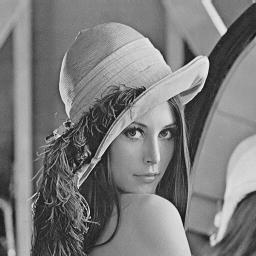

In [3]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gimg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg.shape)
#plt.imshow(gimg, cmap='gray')
cv2_imshow(gimg)

In [4]:
gx = np.array([[-1, 0, 1]], dtype = int)
gy = np.array([[-1, -2, -1]], dtype = int)

In [24]:
x = cv2.filter2D(gimg, -1, gx)
y = cv2.filter2D(gimg, -1, gy)

In [25]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
outimg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

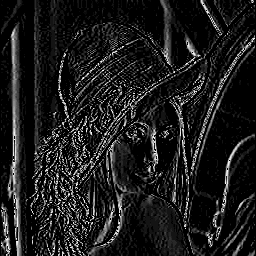

In [26]:
outimg = outimg * 10
cv2_imshow(outimg)

In [27]:
gBin = np.zeros((gimg.shape[0], gimg.shape[1]), dtype = np.ubyte)

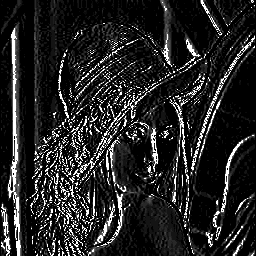

In [28]:
threshold = 100
for h in range(gimg.shape[0]):
  for w in range(gimg.shape[1]):
    if outimg[h,w] > threshold:
      outimg[h,w] = 255

cv2_imshow(outimg)